In [1]:
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"]="plaidml.keras.backend"
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### __Image Augmentation using Keras API and ImageGenerator__

In [2]:
#read in data, assign training and validation paths
cat_dogdat = '/Users/nicksbox/Documents/Data/TensorFlow_Dev_Course/cats_and_dogs_filtered'
train_dir = os.path.join(cat_dogdat, 'train')
validation_dir = os.path.join(cat_dogdat, 'validation')

In [3]:
#cat directories for training and validation
train_cats_dir = os.path.join(train_dir, 'cats')
val_cats_dir = os.path.join(validation_dir, 'cats')

In [4]:
#dog directories for training and validation
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])       

In [6]:
#compile model
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
#scale images
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [8]:
#flow data with data image generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#create history to track performance of model - No Image Augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=100,
    validation_data = val_generator,
    validation_steps = 50,
    verbose=2)

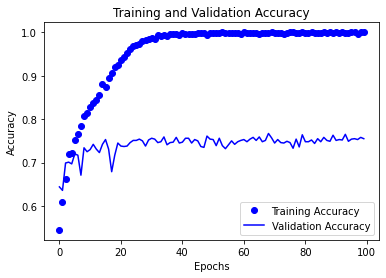

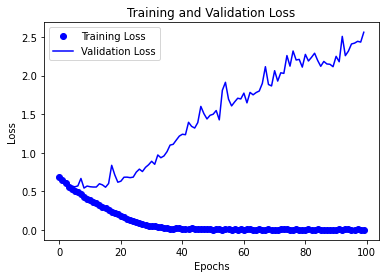

In [10]:
#plot model performance
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Note the overfitting above. 

In [ ]:
#define data directories
train_dir = os.path.join(cat_dogdat, 'train')
validation_dir = os.path.join(cat_dogdat, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
val_cats_dir = os.path.join(validation_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])     

#compile model
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#data augmentation with data generator
train_Datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1/255)

#flow data with data image generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

#train model with image augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=100,
    validation_data = val_generator,
    validation_steps = 50,
    verbose=2)

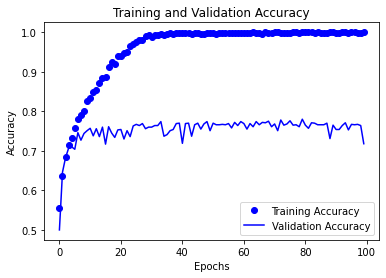

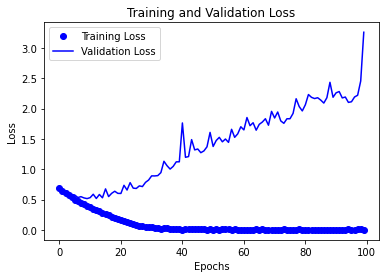

In [13]:
#plot model performance
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Maybe a little better with image augmentation...